In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn import neighbors, tree, naive_bayes, model_selection,preprocessing
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer, scale, OneHotEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.externals import joblib
from sklearn.feature_selection import RFE, VarianceThreshold, SelectFromModel,SelectKBest, mutual_info_regression, mutual_info_classif, chi2
from sklearn import metrics
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.decomposition import PCA


#Handle annoying warnings
import warnings, sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)

In [2]:
arbnb=pd.read_csv('/Users/appobs/Desktop/hw/project/new-york-city-airbnb-open-data/AB_NYC_2019.csv', delimiter = ',', sep='\t')
arbnb.head(10)
arbnb.shape
arbnb.columns.values

array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], dtype=object)

In [3]:
arbnb.describe(include="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47896,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019/6/23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [4]:
# check correlation matrix
corr = arbnb.corr()
corr

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


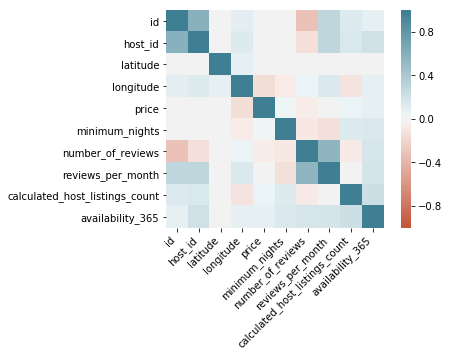

In [5]:
#Data Visualization for correlation matrix
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

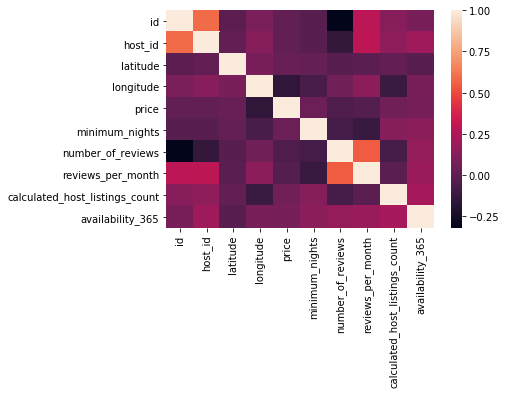

In [6]:
#Data Visualization for correlation matrix (2)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [7]:
#Check missing value
arbnb.isnull()[0:10]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
bool_series = pd.isnull(arbnb[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']])

In [9]:
arbnb['last_review'].fillna(arbnb['last_review'].mode()[0], inplace=True)
arbnb['reviews_per_month'].fillna(arbnb['reviews_per_month'].mode()[0], inplace=True)

In [10]:
arbnb.describe(include="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000
unique,NaN,47896,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019/6/23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,11465,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.095022,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.594493,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.040000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.370000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,1.580000,2.000000,227.000000


In [11]:
# Subset dataset without names

arbnb_after_clean = arbnb[['id', 'host_id', 'neighbourhood_group',
       'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

arbnb_after_clean.head(10)


,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,2018/10/19,0.21,6,365
1,2595,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2019/5/21,0.38,2,355
2,3647,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,2019/6/23,0.02,1,365
3,3831,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,2019/7/5,4.64,1,194
4,5022,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,2018/11/19,0.10,1,0
5,5099,7322,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,2019/6/22,0.59,1,129
6,5121,7356,Brooklyn,40.68688,-73.95596,Private room,60,45,49,2017/10/5,0.40,1,0
7,5178,8967,Manhattan,40.76489,-73.98493,Private room,79,2,430,2019/6/24,3.47,1,220
8,5203,7490,Manhattan,40.80178,-73.96723,Private room,79,2,118,2017/7/21,0.99,1,0
9,5238,7549,Manhattan,40.71344,-73.99037,Entire home/apt,150,1,160,2019/6/9,1.33,4,188


In [12]:
arbnb_after_clean.columns.values

array(['id', 'host_id', 'neighbourhood_group', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'], dtype=object)

In [13]:
arbnb_after_clean.shape

(48895, 13)

In [14]:
# Create dummy variable for PCA
arbnb_after_clean_dummy = pd.get_dummies(arbnb_after_clean[['neighbourhood_group', 'room_type']])
arbnb_after_clean_dummy.head(10)

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,0,1,0
3,0,1,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0
5,0,0,1,0,0,1,0,0
6,0,1,0,0,0,0,1,0
7,0,0,1,0,0,0,1,0
8,0,0,1,0,0,0,1,0
9,0,0,1,0,0,1,0,0


In [15]:
arbnb_after_clean_withDummy = pd.concat([arbnb_after_clean, arbnb_after_clean_dummy], axis=1)
arbnb_after_clean_withDummy.columns.values

array(['id', 'host_id', 'neighbourhood_group', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'], dtype=object)

In [16]:
arbnb_after_clean_withDummy = arbnb_after_clean_withDummy[['id', 'host_id', 'latitude', 'longitude',
       'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room']]

arbnb_after_clean_withDummy.shape

(48895, 18)

In [17]:
arbnb_after_clean_withDummy.columns.values

array(['id', 'host_id', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'], dtype=object)

In [18]:
#### Scale the data to be normalized
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit_transform(arbnb_after_clean_withDummy)


/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.00000000e+00, 1.27224202e-06, 3.57393472e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.53488972e-06, 1.48367479e-06, 6.14198950e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.03688894e-05, 7.99799139e-06, 7.48251748e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [9.99950281e-01, 8.56321462e-02, 7.62116776e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99955159e-01, 1.12946369e-01, 6.23611682e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.48314579e-01, 6.39412491e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [19]:
## Lets's try to extract components via PCA 
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(min_max_scaler.fit_transform(arbnb_after_clean_withDummy))

/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
## Percentage of variance explained by each of the selected components.
print(['%0.2f' % z for z in pca.explained_variance_ratio_]) 

['0.35', '0.27', '0.12', '0.09']


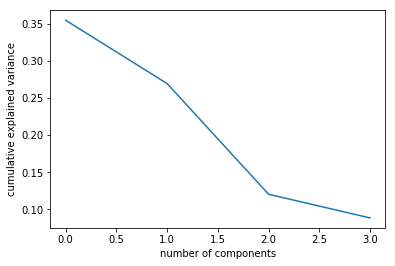

In [21]:
plt.plot((pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [22]:
#### Ready to use supervised learning to make prediction

In [23]:
arbnb_after_clean_withDummy.head(10)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0
2,3647,4632,40.80902,-73.94190,150,3,0,0.02,1,365,0,0,1,0,0,0,1,0
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0
5,5099,7322,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0
6,5121,7356,40.68688,-73.95596,60,45,49,0.40,1,0,0,1,0,0,0,0,1,0
7,5178,8967,40.76489,-73.98493,79,2,430,3.47,1,220,0,0,1,0,0,0,1,0
8,5203,7490,40.80178,-73.96723,79,2,118,0.99,1,0,0,0,1,0,0,0,1,0
9,5238,7549,40.71344,-73.99037,150,1,160,1.33,4,188,0,0,1,0,0,1,0,0


In [24]:
arbnb_after_clean_withDummy.columns.values

array(['id', 'host_id', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'], dtype=object)

In [25]:
# Create target 
x = arbnb_after_clean_withDummy.drop('room_type_Private room',1).as_matrix()
y = arbnb_after_clean_withDummy['room_type_Private room'].as_matrix()

/Users/appobs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/appobs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
#take a look at x
x

array([[2.5390000e+03, 2.7870000e+03, 4.0647490e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.5950000e+03, 2.8450000e+03, 4.0753620e+01, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [3.6470000e+03, 4.6320000e+03, 4.0809020e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.6485431e+07, 2.3492952e+07, 4.0814750e+01, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [3.6485609e+07, 3.0985759e+07, 4.0757510e+01, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.6487245e+07, 6.8119814e+07, 4.0764040e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [27]:
#take a look at y
y

array([1, 0, 1, ..., 0, 0, 1], dtype=uint8)

In [28]:
#Test/Train split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=1)

In [29]:
## Take a look at the shape
x_train.shape, y_train.shape

((34226, 17), (34226,))

In [33]:
#Normalize again 
min_max_scaler.fit(x_train)
x_train_norm = min_max_scaler.transform(x_train)
x_test_norm = min_max_scaler.transform(x_test)

In [49]:
#### Naive Bayes

nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(x_train_norm, y_train)
cv_scores = model_selection.cross_val_score(nbclf, x_train_norm, y_train, cv=5)
cv_scores


print ("Score on Training: ", nbclf.score(x_train_norm, y_train))

print ("Score on Test: ", nbclf.score(x_test, y_test))

print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

print ("Accuracy on Training: ",  nbclf.score(x_train_norm, y_train))

nbpreds_test = nbclf.predict(x_test)

print(classification_report(y_test, nbpreds_test))
scores_nbAUC = metrics.roc_auc_score(y_test, nbclf.predict_proba(x_test)[:,1])                                                                                      
print('Naive Bayes (Gaussian) AUC:', scores_nbAUC)                                                                     #AUC only works with binary classes, not multiclass            


Score on Training:  0.9962309355460761
Score on Test:  0.5189174449519395
Overall Accuracy on X-Val: 1.00 (+/- 0.00)
Accuracy on Training:  0.9962309355460761
              precision    recall  f1-score   support

           0       0.58      0.43      0.49      7968
           1       0.48      0.63      0.54      6701

   micro avg       0.52      0.52      0.52     14669
   macro avg       0.53      0.53      0.52     14669
weighted avg       0.53      0.52      0.51     14669

Naive Bayes (Gaussian) AUC: 0.5277772408841453


In [50]:
#### Naive Bayes(MultinomialNB)
nbmclf = naive_bayes.MultinomialNB()
nbmclf = nbmclf.fit(x_train_norm, y_train)
nbm_cv_scores = model_selection.cross_val_score(nbmclf, x_train_norm, y_train, cv=5)
nbm_cv_scores

print ("Score on Training: ", nbmclf.score(x_train_norm, y_train))

print ("Score on Test: ", nbmclf.score(x_test, y_test))

print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (nbm_cv_scores.mean(), nbm_cv_scores.std() * 2))

print ("Accuracy on Training: ",  nbmclf.score(x_train_norm, y_train))

nbmpreds_test = nbmclf.predict(x_test)

print(classification_report(y_test, nbmpreds_test))
scores_nbmAUC = metrics.roc_auc_score(y_test, nbmclf.predict_proba(x_test)[:,1])                                                                                      
print('Naive Bayes (MultinomialNB) AUC:', scores_nbmAUC)                                        #AUC only works with binary classes, not multiclass            



Score on Training:  0.9996786069070297
Score on Test:  0.4568136887313382
Overall Accuracy on X-Val: 1.00 (+/- 0.00)
Accuracy on Training:  0.9996786069070297
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7968
           1       0.46      1.00      0.63      6701

   micro avg       0.46      0.46      0.46     14669
   macro avg       0.23      0.50      0.31     14669
weighted avg       0.21      0.46      0.29     14669

Naive Bayes (MultinomialNB) AUC: 0.5


/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
#### Random Forest Classifier
RFclf = RandomForestClassifier(criterion='entropy')
RFclf =RFclf.fit(x_train_norm, y_train)
RF_cv_scores = model_selection.cross_val_score(RFclf, x_train_norm, y_train, cv=5)
RF_cv_scores

print ("Score on Training: ", RFclf.score(x_train_norm, y_train))

print ("Score on Test: ", RFclf.score(x_test, y_test))

print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (RF_cv_scores.mean(), RF_cv_scores.std() * 2))

print ("Accuracy on Training: ",  RFclf.score(x_train_norm, y_train))

RFpreds_test = RFclf.predict(x_test)

print(classification_report(y_test, RFpreds_test))
scores_rfAUC = metrics.roc_auc_score(y_test, RFclf.predict_proba(x_test)[:,1])                                                                                      
print('Random Forest AUC:', scores_rfAUC )                                        #AUC only works with binary classes, not multiclass            




/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score on Training:  1.0
Score on Test:  1.0
Overall Accuracy on X-Val: 1.00 (+/- 0.00)
Accuracy on Training:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7968
           1       1.00      1.00      1.00      6701

   micro avg       1.00      1.00      1.00     14669
   macro avg       1.00      1.00      1.00     14669
weighted avg       1.00      1.00      1.00     14669

Random Forest AUC: 1.0
